References:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
- https://github.com/ftudisco/scalefreechunglu/blob/master/python/fastchunglu.py
- https://github.com/ftudisco/scalefreechunglu
- Dario Fasino, Arianna Tonetto, Francesco Tudisco. Generating large scale‐free networks with the Chung–Lu random graph model / Networks, 2020, p.1-14. https://doi.org/10.1002/net.22012
- Fasino D, Tonetto A, Tudisco F. Generating large scale-free networks with the Chung–Lu random graph model. Networks 2020;1–14. https://doi.org/10.1002/net.22012

In [1]:
import pandas
import networkx as nx
import numpy as np

# import urllib.request
# urllib.request.urlretrieve('https://raw.githubusercontent.com/djgroen/flee-release/master/examples/ssudan_input_csv/routes.csv', 'routes.csv')
routes = pandas.read_csv('https://raw.githubusercontent.com/djgroen/flee-release/master/examples/ssudan_input_csv/routes.csv', sep=',')
locations = pandas.read_csv('https://raw.githubusercontent.com/djgroen/flee-release/master/examples/ssudan_input_csv/locations.csv', sep=',', index_col='#name')
routes.head()
edges = pandas.DataFrame({'source': routes['#name1'],
                          'target': routes['name2'],
                          'weight': routes['distance'],})
G = nx.from_pandas_edgelist(edges, edge_attr=True)

nx.draw(G)

array([0.24137931, 0.29310345, 0.36206897, 0.0862069 , 0.01724138])

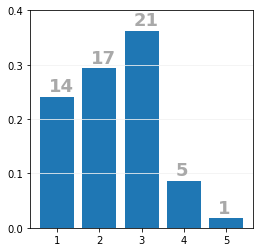

In [3]:
import matplotlib.pyplot as plt
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

def plot_degrees(degree_sequence):
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    cnt=np.array(cnt)
    fig, ax = plt.subplots(figsize=(4,4))
    plt.bar(deg, cnt/sum(cnt), width=0.80)
    ax.set_yticks(0.1*np.array(range(0,5,1)))
    for i, v, label in zip(deg, cnt/sum(cnt), cnt):
        ax.text(i-0.2, v + 0.01, str(label), color='darkgray', fontweight='bold', fontsize=18)
    plt.grid(axis='y', color='0.95')
    return deg, cnt/sum(cnt)
deg, cnt = plot_degrees(degree_sequence)
plt.savefig('ssudan_deg_distrib.png', dpi=300)
cnt

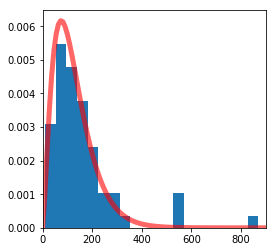

In [4]:
destsnces=sorted(map(lambda _: _[2]['weight'], G.edges(data=True)))

from scipy.stats import chi2
df, scale = 5, 25

fig, ax = plt.subplots(figsize=(4,4))
plt.hist(destsnces, bins=20, density = True)
x = np.linspace(0, 900, 100)
plt.xlim((0,900))
plt.plot(x, chi2.pdf(x, df, scale=25),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.savefig('ssudan_distances.png', dpi=300)

Randomly generated degree sequence with the degree distribution close to the degree distribution for South Sudan

[0.24137931 0.53448276 0.89655172 0.98275862 1.        ] [0.24137931 0.29310345 0.36206897 0.0862069  0.01724138]


((0, 1, 2, 3, 4), array([0.2453 , 0.2945 , 0.36015, 0.0832 , 0.01685]))

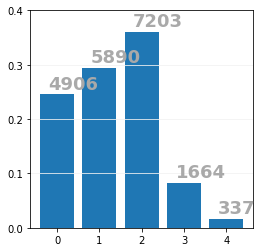

In [7]:
n=20000

degree_sequence = np.zeros(n, dtype=int)

ws=np.cumsum(cnt/sum(cnt))
x = np.random.uniform(size=n)
for i, interval in enumerate(zip([0] + list(ws[:-1]), ws)):
    idx = np.where((interval[0] <= x) & (x < interval[1]))
    degree_sequence[idx]=i
print(ws, cnt/sum(cnt))
degree_sequence=sorted(degree_sequence)

plot_degrees(degree_sequence)

Deterministically generated degree sequence with the same degree distribution as in South Sudan

((1, 2, 3, 4, 5), array([0.2414 , 0.2931 , 0.36205, 0.0862 , 0.01725]))

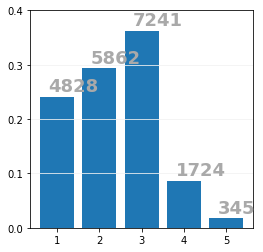

In [8]:
import random 

def generate_degree_sequence(cnt, n):
    counts=np.array(np.rint(n*cnt), dtype=int)
    while sum(counts) > n:
        i = random.randint(0, len(counts)-1)
        if counts[i] > 0:
            counts[i] -=1
    while sum(counts) < n:
        i = random.randint(0, len(counts)-1)
        counts[i] +=1

    return np.concatenate([(d+1)*np.ones(m, dtype=int) for d, m in enumerate(counts)])

degree_sequence=generate_degree_sequence(cnt, 20000)
plot_degrees(degree_sequence)

Sample graph from Chung-Lu random graph model

In [9]:
from networkx import Graph
import numpy as np

# The two functions below generate an instance of the Chung-Lu random graph model with expected degree sequence w

def make_nx_graph(w):
    # Outputs the networkx.Graph of the graph
    n = np.size(w)
    s = np.sum(w)
    m = ( np.dot(w,w)/s )**2 + s
    m = int(m/2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum,0,0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m,1),wsum)
    J = np.digitize(np.random.rand(m,1),wsum)
    G = Graph()
    G.add_nodes_from(range(1,n+1))
    G.add_edges_from(tuple(zip(I.reshape(m,),J.reshape(m,))))
    return G

G_rand=make_nx_graph(degree_sequence)

Sample route length from $\chi^2$

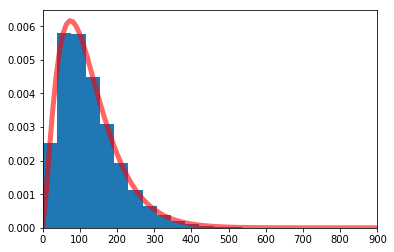

In [11]:
def generate_distances(G, df=5, scale=25):
    return chi2.ppf(np.random.uniform(size=G.number_of_edges()), df, loc=0, scale=scale)

distances=generate_distances(G_rand, df=5, scale=25)
    
fig, ax = plt.subplots()
plt.hist(distances, bins=20, density = True)
x = np.linspace(0, 900, 100)
plt.xlim((0,900))
plt.plot(x, chi2.pdf(x, df, scale=25),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

Sample random location graph

0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1


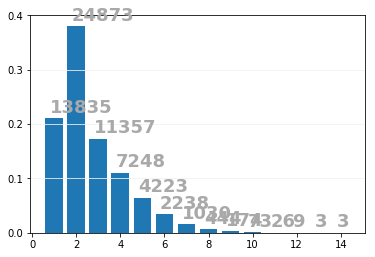

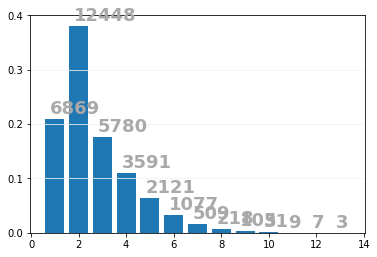

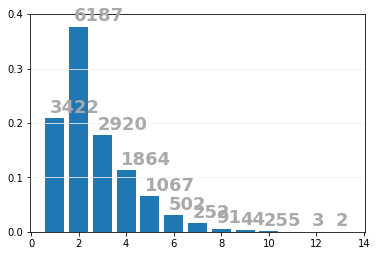

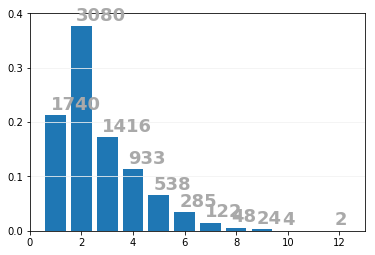

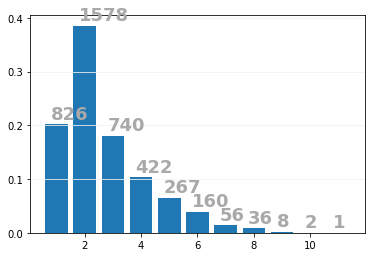

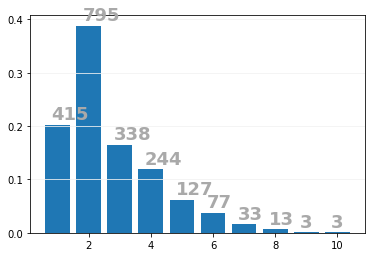

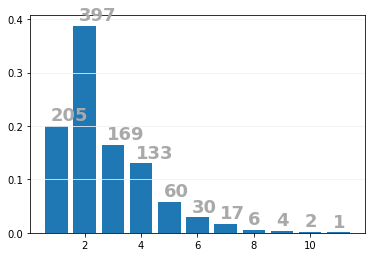

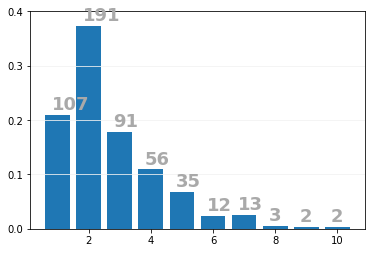

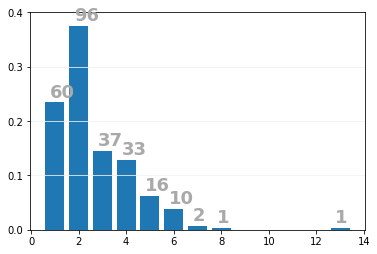

In [379]:
# degree_sequence=generate_degree_sequence(cnt, 20000)
# plot_degrees(degree_sequence)

# edge_list.to_csv()
for N in map(lambda _:2**_, reversed(range(8,17))):
    degree_sequence=generate_degree_sequence(cnt, N)

    G_rand=make_nx_graph(degree_sequence)
#     deg0=[node for node in G_rand.nodes() if G_rand.degree(node) == 0]
#     for source in deg0:
#         G_rand.add_edge(source, random.randint(1, N))
    source = None
    for c in nx.connected_components(G_rand):
        if source is not None:
            G_rand.add_edge(source, random.choice(list(c)))
        source = random.choice(list(c))
    distances=generate_distances(G_rand, df, scale)
    edge_list=pandas.DataFrame(list(G_rand.edges()), columns=['#name1', 'name2'])
    # print(len(degree_sequence), len(set(range(1, len(degree_sequence)+1)) - set(nx.isolates(G_rand))))
    print(len(set(nx.isolates(G_rand)))/len(degree_sequence), nx.number_connected_components(G_rand))
    edge_list['weight'] = list(distances)
    edge_list.to_csv('random_graph_{}.csv'.format(N), index=False)
    degree_sequence = sorted([d for n, d in G_rand.degree()], reverse=True)
    x,y = plot_degrees(degree_sequence)

Plot benchmark results

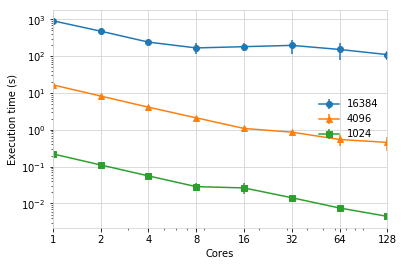

In [34]:
nnodes_list = 16384, 4096, 1024
styles='o-', '^-', 's-', '<-'

fig, ax = plt.subplots()

for nnodes, style in zip (nnodes_list, styles[:len(nnodes_list)]):
    df = pandas.read_csv('lge_{}.csv'.format(nnodes), names=("nnodes","nthreads","time"))
    df["time"] = 1e-3*df["time"] # convert time from ms to seconds
#     measures = df.groupby(['nnodes', 'nthreads'], as_index=False).mean()
    measures = df.groupby(['nnodes', 'nthreads'], as_index=False).agg({'time':['mean','std']})
    measures.columns = ['nnodes', 'nthreads', 'time', 'std']
#     plt.loglog(measures['nthreads'], measures['time'], style, label=str(nnodes))
    plt.errorbar(measures['nthreads'], measures['time'], yerr=3*measures['std'], fmt=style, label=str(nnodes))


ax.set_xscale("log")
ax.set_yscale("log")
# ax.errorbar(x,y,yerr=z, fmt = 'b')
    
# ax.set_xticks(2**np.array(range(0,7+1)))
# ax.set_xticklabels(2**np.array(range(0,10)))
nthreads = df['nthreads'].unique()
ax.set_xticks(nthreads)
ax.set_xticklabels(nthreads)
plt.xlim((min(nthreads),max(nthreads)))
ax.set_xlabel('Cores')
ax.set_ylabel('Execution time (s)')
#ax.set_edgecolor("#04253a")
# ax.set_facecolor("#04253a")

plt.grid(color='lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray') 
ax.spines['right'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
# ax.tick_params(axis='x', colors='lightgray')
# ax.tick_params(axis='y', colors='lightgray')

#legend = ax.legend(list(map(str, nnodes_list)), loc="right", framealpha=0)
legend = ax.legend(loc="right", framealpha=0)
# for text in legend.get_texts():
#     text.set_color("#444444")
plt.savefig('lge_1024.png', dpi=300)